In [1]:
import pandas as pd
import requests
import json
import akshare as ak

ak.__version__

'1.9.4'

In [2]:
res = requests.get('http://127.0.0.1:8000/nbs?dbcode=hgjd&zb=A0103&sj=1990-')
# loads不是load
resJson = json.loads(res.text)
# resJson

In [3]:
gdpDf = pd.DataFrame(resJson['data']['国内生产总值指数(上年同期=100)_当季值'])
def replaceChar(c):
    m = {
        'A': '0101',
        'B': '0401',
        'C': '0701',
        'D': '1001'
    }
    return c[0:4] + m[c[4]]
gdpDf['date'] = pd.to_datetime(gdpDf['date'].map(replaceChar), format='%Y%m%d')
# set_index默认生成新df，传inplace参数就不会
# https://medium.com/@petehouston/set-index-for-dataframe-in-pandas-55400e306e42
gdpDf.set_index('date', inplace=True)
gdpDf.drop('2022-10-01', inplace=True)
gdpDf.head()

,value
date,
2022-07-01,103.9
2022-04-01,100.4
2022-01-01,104.8
2021-10-01,104.3
2021-07-01,105.2


In [4]:
res = requests.get('http://127.0.0.1:8000/data/monthly_cpi_yoy_2015')
# loads不是load
resJson = json.loads(res.text)

res2 = requests.get('http://127.0.0.1:8000/data/monthly_cpi_yoy_2016_')
resJson2 = json.loads(res2.text)

In [5]:
cpiBefore2015Df = pd.DataFrame(resJson['data']['居民消费价格指数(上年同月=100)'])
cpiBefore2015Df['date'] = pd.to_datetime(cpiBefore2015Df['date'], format='%Y%m')
cpiBefore2015Df.set_index('date', inplace=True)

cpiAfter2016Df = pd.DataFrame(resJson2['data']['居民消费价格指数(上年同月=100)'])
cpiAfter2016Df['date'] = pd.to_datetime(cpiAfter2016Df['date'], format='%Y%m')
cpiAfter2016Df.set_index('date', inplace=True)

cpiDf = pd.concat([cpiAfter2016Df, cpiBefore2015Df])
cpiDf

,value
date,
2023-03-01,0.0
2023-02-01,101.0
2023-01-01,102.1
2022-12-01,101.8
2022-11-01,101.6
...,...
1983-05-01,0.0
1983-04-01,0.0
1983-03-01,0.0


In [6]:
bond_zh_us_rate_df = ak.bond_zh_us_rate()
bond_zh_us_rate_df['日期'] = pd.to_datetime(bond_zh_us_rate_df['日期'])
bond_zh_us_rate_df.set_index('日期', inplace=True)
bond_zh_us_rate_df

,中国国债收益率2年,中国国债收益率5年,中国国债收益率10年,中国国债收益率30年,中国国债收益率10年-2年,中国GDP年增率,美国国债收益率2年,美国国债收益率5年,美国国债收益率10年,美国国债收益率30年,美国国债收益率10年-2年,美国GDP年增率
日期,,,,,,,,,,,,
1990-12-19,NaN,NaN,NaN,NaN,NaN,NaN,7.21,7.64,8.00,8.19,0.79,NaN
1990-12-20,NaN,NaN,NaN,NaN,NaN,NaN,7.25,7.67,8.05,8.22,0.80,NaN
1990-12-21,NaN,NaN,NaN,NaN,NaN,NaN,7.30,7.75,8.11,8.28,0.81,NaN
1990-12-24,NaN,NaN,NaN,NaN,NaN,NaN,7.35,7.84,8.20,8.36,0.85,NaN
1990-12-26,NaN,NaN,NaN,NaN,NaN,NaN,7.27,7.78,8.15,8.30,0.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-24,2.4078,2.7066,2.8676,3.2419,0.4598,NaN,3.76,3.41,3.38,3.64,-0.38,NaN
2023-03-27,2.4068,2.6922,2.8551,3.2319,0.4483,NaN,3.94,3.59,3.53,3.77,-0.41,NaN
2023-03-28,2.4148,2.7003,2.8556,3.2319,0.4408,NaN,4.02,3.63,3.55,3.77,-0.47,NaN


In [7]:
# fdrDf = ak.repo_rate_hist(start_date="20200930", end_date="20201029")
# fdrDf

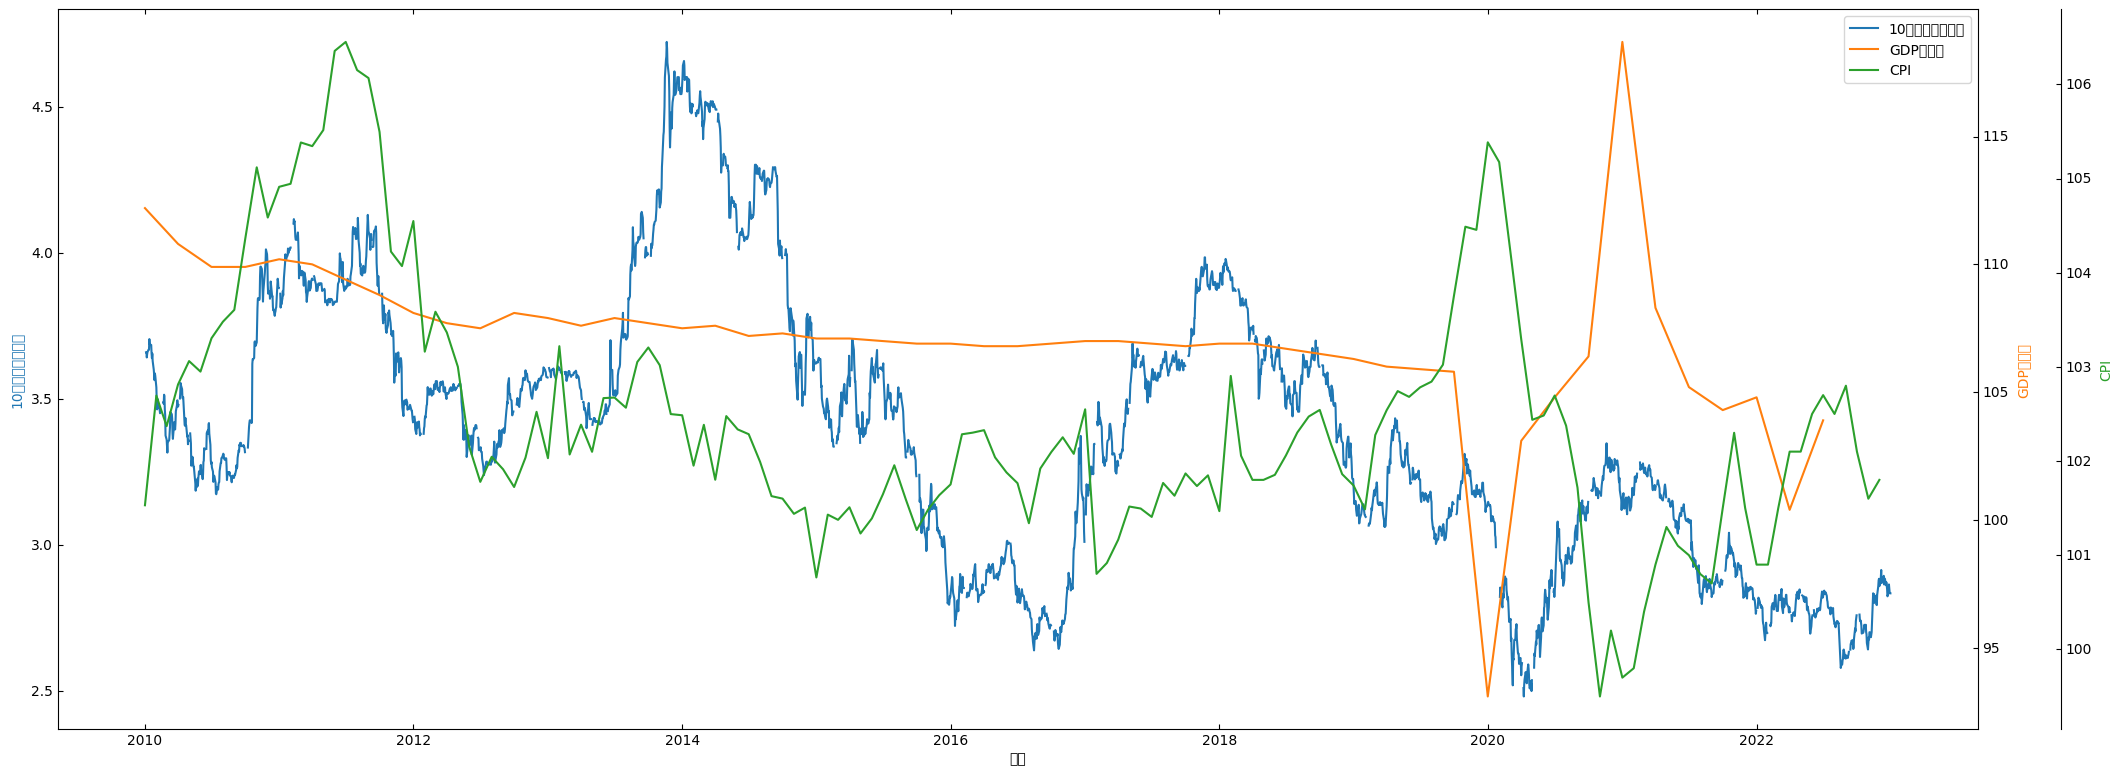

In [9]:
# https://matplotlib.org/stable/gallery/axisartist/demo_parasite_axes.html#sphx-glr-gallery-axisartist-demo-parasite-axes-py
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

def drawFig(start, end):
    
    fig = plt.figure()

    # 参数：尺寸[left bottom width height]
    host = fig.add_axes([0.15, 0.1, 3, 1.5], axes_class=HostAxes)
    par1 = ParasiteAxes(host, sharex=host)
    par2 = ParasiteAxes(host, sharex=host)
    host.parasites.append(par1)
    host.parasites.append(par2)

    # 隐藏host的右侧y轴
    host.axis["right"].set_visible(False)

    # par1和par2的y轴
    par1.axis["right"] = par1.new_fixed_axis(loc="right", offset=(0, 0))
    par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

    p1, = host.plot(bond_zh_us_rate_df['中国国债收益率10年'][start:end], label="10年期国债收益率")
    p2, = par1.plot(gdpDf[start:end], label="GDP增长率")
    p3, = par2.plot(cpiDf[start:end], label="CPI")

    host.set_xlabel("日期")
    host.set_ylabel("10年期国债收益率")
    par1.set_ylabel("GDP增长率")
    par2.set_ylabel("CPI")

    host.legend()

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    par2.axis["right"].label.set_color(p3.get_color())

    plt.show()
    
drawFig('2010', '2022')